<a href="https://colab.research.google.com/github/Yoshiki0418/Deep_Learning/blob/main/DL_Lecture2/regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regularization

In [4]:
# googleドライブをマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/Deep_Learning/DL_Lecture2

/content/drive/MyDrive/Deep_Learning/DL_Lecture2


In [6]:
import matplotlib.pyplot as plt
import torch
from torch.nn import functional as F
from torch import nn, optim
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms

%load_ext autoreload
%autoreload 2
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### L2正則(重み減衰)をスクラッチ実装

In [5]:
X = torch.tensor([[1., 2., 3.], [4., 5., 6.]])
X

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [6]:
# フロベニウスノルムを計算
torch.linalg.norm(X) # torch.sqrt(torch.sum(X**2))と同じ

tensor(9.5394)

In [7]:
def get_conv_model():
    return nn.Sequential(
    # 3x28x28
    nn.Conv2d(3, 4, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    # 4x14x14
    nn.Conv2d(4, 8, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    # 8x7x7
    nn.Conv2d(8, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    # 16x4x4
    nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    # 32x2x2 -> GAP -> 32 x 1 x 1

    nn.Flatten(),
    # # 128 -> 32
    nn.Linear(128, 10)
    # nn.Linear(32, 10)
    # 10
)

In [15]:
model = get_conv_model()

In [17]:
# 実際には学習ループに組み込む
l2_reg = torch.tensor(0.)
for name, param in model.named_parameters():
    # print(name, param)
    if 'weight' in name:
        l2_reg += torch.linalg.norm(param)**2
# loss += (weight_decay / (2*m)) * l2_reg

### PytorchでのL2正則

In [16]:
optim.SGD(model.parameters(), lr=0.03, weight_decay=0.01)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.03
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0.01
)

### L2正則の有無でモデル比較

In [18]:
conv_model = get_conv_model()
conv_model_l2 = get_conv_model()
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    # CIFAR10用
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
train_dataset = torchvision.datasets.CIFAR10('./cifar10_data', train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.CIFAR10('./cifar10_data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=128, num_workers=4)

opt = optim.SGD(conv_model.parameters(), lr=0.03)
opt_l2 = optim.SGD(conv_model_l2.parameters(), lr=0.03, weight_decay=0.001)

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [19]:
num_epoch = 20
train_losses, val_losses, val_accuracies = utils.learn(conv_model, train_loader, val_loader, opt, F.cross_entropy, num_epoch=num_epoch)
train_losses_l2, val_losses_l2, val_accuracies_l2 = utils.learn(conv_model_l2, train_loader, val_loader, opt_l2, F.cross_entropy, num_epoch=num_epoch)

epoch: 0: train error: 2.2271628861537067, validation error: 2.106683365906341, validation accuracy: 0.24742879746835442


epoch: 1: train error: 2.0151622121596273, validation error: 1.8880099888089337, validation accuracy: 0.33208069620253167


epoch: 2: train error: 1.8460466358667749, validation error: 1.7803828535200674, validation accuracy: 0.36323180379746833


epoch: 3: train error: 1.721927960510449, validation error: 1.6731037188179885, validation accuracy: 0.39339398734177217


epoch: 4: train error: 1.6382084319658596, validation error: 1.5981947560853595, validation accuracy: 0.42780854430379744


epoch: 5: train error: 1.5764409087198166, validation error: 1.5535184808924227, validation accuracy: 0.4399723101265823


epoch: 6: train error: 1.5220174728452092, validation error: 1.4879770957970921, validation accuracy: 0.47379351265822783


epoch: 7: train error: 1.467218198739659, validation error: 1.4424357021911234, validation accuracy: 0.48388053797468356


epoch: 8: train error: 1.4289316451153182, validation error: 1.445759039890917, validation accuracy: 0.4834849683544304


epoch: 9: train error: 1.4019473422213893, validation error: 1.443069771875309, validation accuracy: 0.49732990506329117


epoch: 10: train error: 1.3774641749194212, validation error: 1.4262073507791833, validation accuracy: 0.4899129746835443


epoch: 11: train error: 1.3581889178746802, validation error: 1.3992623860322977, validation accuracy: 0.504746835443038


epoch: 12: train error: 1.3395138265531692, validation error: 1.3345104455947876, validation accuracy: 0.5266020569620253


epoch: 13: train error: 1.3194501104257297, validation error: 1.4095605641980715, validation accuracy: 0.5014833860759493


epoch: 14: train error: 1.305263142756489, validation error: 1.3354038543339017, validation accuracy: 0.5204707278481012


epoch: 15: train error: 1.2958340324709177, validation error: 1.3163619750662694, validation accuracy: 0.5301621835443038


epoch: 16: train error: 1.2818735283049172, validation error: 1.323674954945528, validation accuracy: 0.5274920886075949


epoch: 17: train error: 1.2701119797309037, validation error: 1.2838133354730243, validation accuracy: 0.543809335443038


epoch: 18: train error: 1.2612620924439881, validation error: 1.3061941605580003, validation accuracy: 0.5380735759493671


epoch: 19: train error: 1.2506612289287244, validation error: 1.2774560225160816, validation accuracy: 0.543809335443038


epoch: 0: train error: 2.223964471341399, validation error: 2.074985801419125, validation accuracy: 0.25761471518987344


epoch: 1: train error: 2.020144739419298, validation error: 1.9328194011615802, validation accuracy: 0.29489715189873417


epoch: 2: train error: 1.9096533642400562, validation error: 1.8305405317982542, validation accuracy: 0.3389042721518987


epoch: 3: train error: 1.781940596487821, validation error: 1.702933967867984, validation accuracy: 0.39131724683544306


epoch: 4: train error: 1.6698101048579301, validation error: 1.6571756148640113, validation accuracy: 0.4084256329113924


epoch: 5: train error: 1.598421162656506, validation error: 1.5485703190670739, validation accuracy: 0.4473892405063291


epoch: 6: train error: 1.546712243343558, validation error: 1.5136250091504446, validation accuracy: 0.45826740506329117


epoch: 7: train error: 1.508260994311184, validation error: 1.4966856029969227, validation accuracy: 0.4698378164556962


epoch: 8: train error: 1.4760736406916548, validation error: 1.4611120450345776, validation accuracy: 0.4762658227848101


epoch: 9: train error: 1.4476233571386703, validation error: 1.4292051792144775, validation accuracy: 0.484375


epoch: 10: train error: 1.421108629697424, validation error: 1.4170217076434364, validation accuracy: 0.489814082278481


epoch: 11: train error: 1.3999835371666247, validation error: 1.389607115636898, validation accuracy: 0.5049446202531646


epoch: 12: train error: 1.383444198257173, validation error: 1.3934495162360276, validation accuracy: 0.5031645569620253


epoch: 13: train error: 1.3647156081846, validation error: 1.3667061132720755, validation accuracy: 0.510878164556962


epoch: 14: train error: 1.3510851167961764, validation error: 1.3566684873798225, validation accuracy: 0.5120648734177216


epoch: 15: train error: 1.3358208069106197, validation error: 1.388158090506928, validation accuracy: 0.49169303797468356


epoch: 16: train error: 1.324968405391859, validation error: 1.347144659561447, validation accuracy: 0.5178995253164557


epoch: 17: train error: 1.310822436571731, validation error: 1.3414147865923145, validation accuracy: 0.5200751582278481


epoch: 18: train error: 1.2991287488766643, validation error: 1.3164894143237342, validation accuracy: 0.5322389240506329


epoch: 19: train error: 1.2857418982574091, validation error: 1.3144434433949144, validation accuracy: 0.5352056962025317


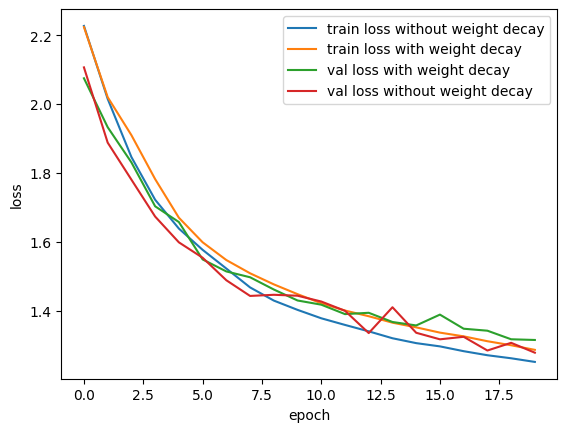

In [20]:
plt.plot(train_losses, label='train loss without weight decay')
plt.plot(train_losses_l2, label='train loss with weight decay')
plt.plot(val_losses_l2, label='val loss with weight decay')
plt.plot(val_losses, label='val loss without weight decay')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

## Dropout

### Dropoutをスクラッチ実装

In [1]:
def dropout(X, drop_p):
    keep_p = 1 - drop_p
    mask = torch.rand(X.shape) < keep_p
    return X * mask / keep_p

In [7]:
X = torch.randn((100, 100))
droped_X = dropout(X, 0.3)

In [8]:
droped_X

tensor([[-2.1217,  2.0802, -0.9232,  ...,  0.0000,  0.3735,  0.0000],
        [ 0.3125, -0.0000,  0.0000,  ...,  0.0769, -0.1945, -1.2137],
        [ 0.0000,  0.9723,  0.0000,  ..., -0.6329,  0.7942, -0.5624],
        ...,
        [-0.0000,  0.1003, -2.7261,  ...,  2.3448,  0.6005,  0.1073],
        [-1.8314, -2.1381,  2.7259,  ...,  1.2841, -0.0000, -0.4801],
        [ 1.6241,  1.3541,  1.8227,  ...,  0.6831, -1.1376,  0.0000]])

In [9]:
# ReLUを適用した後にDropoutをすると，学習時と予測時でスケールが変わるので/keep_pでリスケールしスケールを合わせる
def relu(X):
    return torch.clamp(X, min=0)
relu_out = relu(X)
keep_p = 0.5
mask = torch.rand(X.shape) < keep_p
print((relu_out * mask).sum() / keep_p)
print(relu_out.sum())

tensor(4006.3184)
tensor(3986.6516)


### nn.Dropout

In [10]:
model = nn.Sequential(
    nn.Linear(64, 20),
    nn.ReLU(),
    nn.Dropout(p=0.4),
    nn.Linear(20, 10)
)

In [11]:
model

Sequential(
  (0): Linear(in_features=64, out_features=20, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=20, out_features=10, bias=True)
)